In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

In [2]:
# Load your dataset
data = pd.read_csv('../Datasets/insurance.csv')

In [3]:
data_copy = data
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape # number of rows and columns

(1338, 7)

In [5]:
data.info() # information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe() # statistical information about the data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

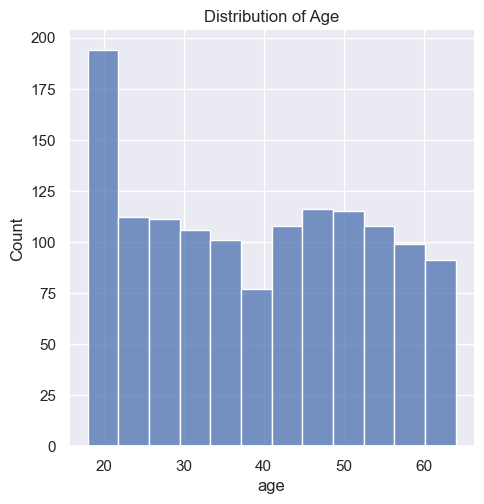

In [7]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(data['age']) # distribution of age
plt.title('Distribution of Age')
plt.show()

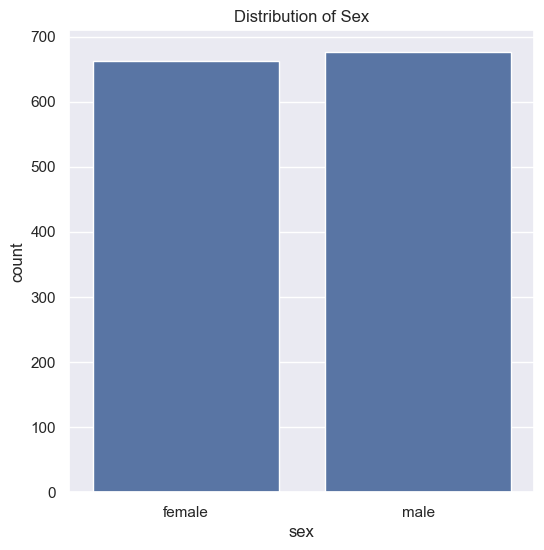

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=data) # distribution of sex
plt.title("Distribution of Sex")
plt.show()

<Figure size 600x600 with 0 Axes>

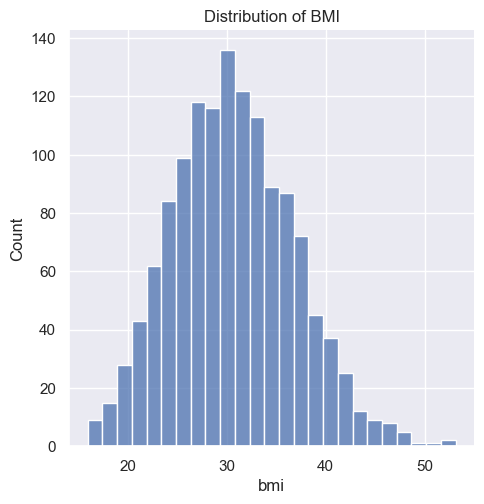

In [9]:
plt.figure(figsize=(6,6))
sns.displot(data['bmi']) # distribution of bmi
plt.title('Distribution of BMI')
plt.show()

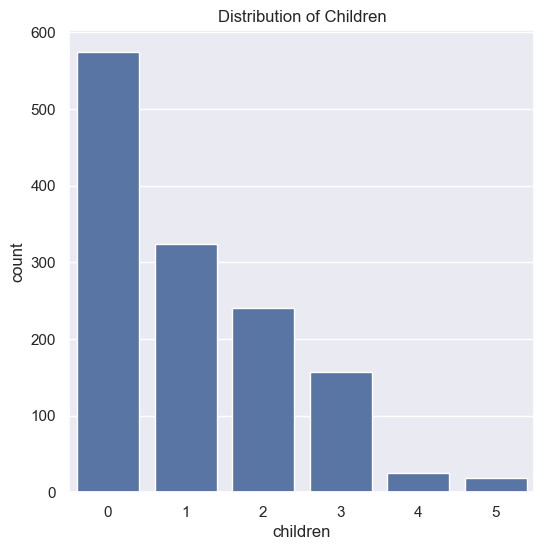

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=data) # distribution of children
plt.title("Distribution of Children")
plt.show()

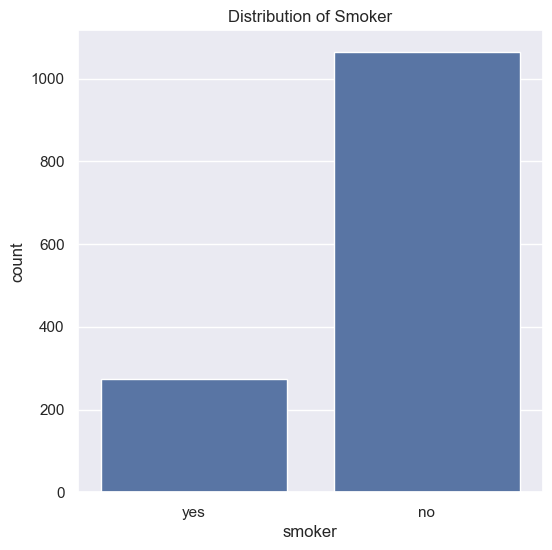

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=data) # distribution of smoker
plt.title("Distribution of Smoker")
plt.show()

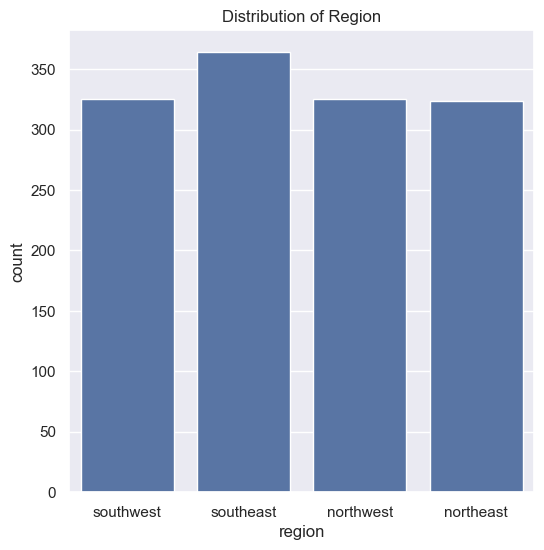

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=data) # distribution of region
plt.title("Distribution of Region")
plt.show()

<Figure size 600x600 with 0 Axes>

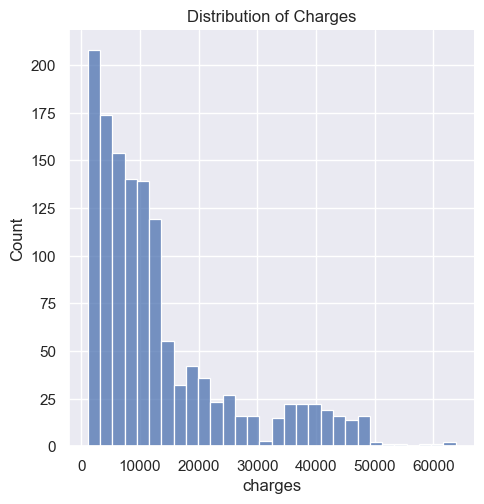

In [13]:
plt.figure(figsize=(6,6))
sns.displot(data['charges']) # distribution of charges
plt.title('Distribution of Charges')
plt.show()

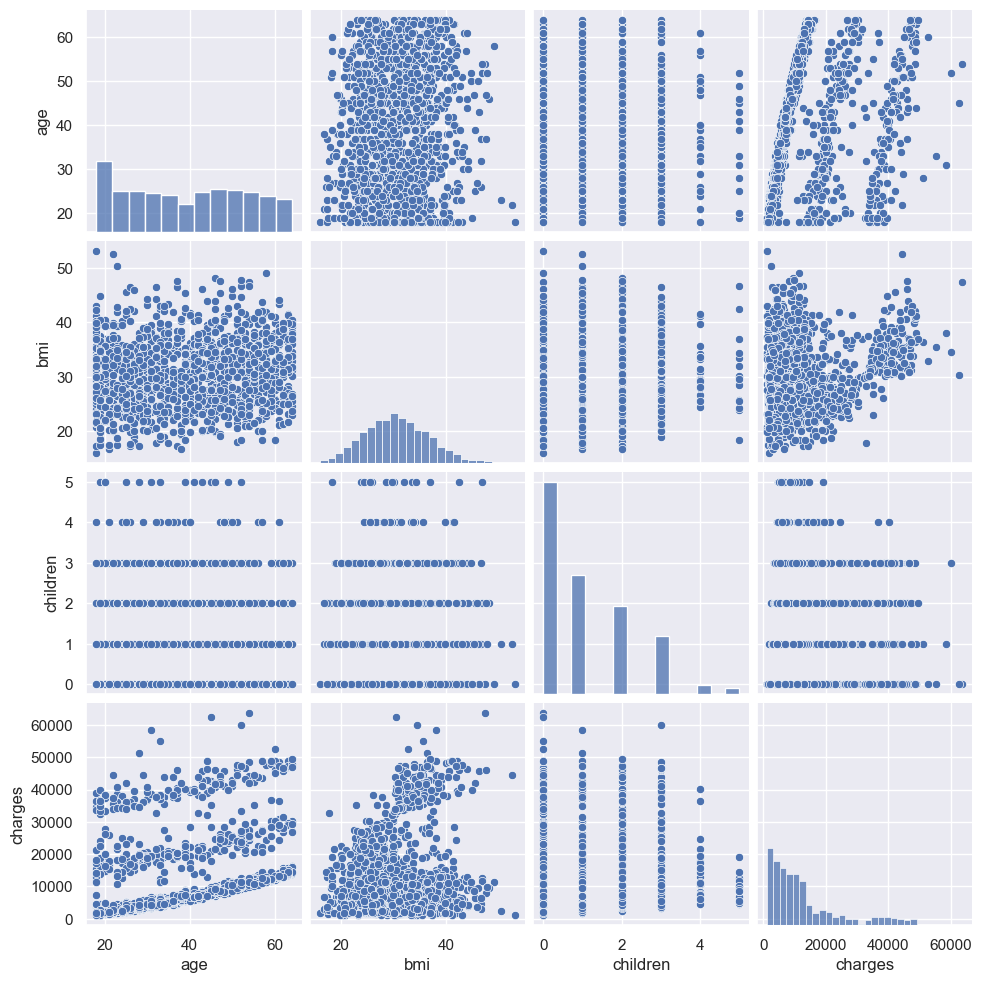

In [14]:
sns.pairplot(data) # pairplot of the data
plt.show()

In [15]:
# Encoding categorical data
data.replace({'sex':{'male':0, 'female':1}}, inplace=True)
data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [16]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [17]:
# Define features (X) and target variable (y)
X = data.drop('charges', axis=1)
y = data['charges']

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [19]:
print(f"X_train shape:  {X_train.shape}, y_train shape: {y_train.shape}, X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape:  (1070, 6), y_train shape: (1070,), X_test shape: (268, 6), y_test shape: (268,)


In [20]:
# Training the model
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
# Evaluating the model
y_train_pred = regressor.predict(X_train)


In [22]:
# R squared error
score_1 = metrics.r2_score(y_train, y_train_pred)
score_1

0.742822839475102

In [23]:
y_test_pred = regressor.predict(X_test)

In [24]:
# R squared error
score_2 = metrics.r2_score(y_test, y_test_pred)
score_2

0.7772564555107726

In [25]:
# Predicting the charges

input_data = (31,1,25.74,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(f"The insurance cost is USD {prediction[0]}, Actuall cost is USD 3756.6216")

The insurance cost is USD 3733.461846124035, Actuall cost is USD 3756.6216


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
# mean absolute error
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mae

3937.552599168963